<a href="https://colab.research.google.com/github/ico1036/Nurion/blob/master/N02_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py

### Read and Open files

In [4]:
data = h5py.File('HEP_data_2018/val.h5')
list(data.keys())

['all_events']

In [5]:
list(data['all_events'].keys()) 

['hist',
 'histEM',
 'histtrack',
 'passSR',
 'passSR4J',
 'passSR5j',
 'weight',
 'y']

### -NERSC-

### These are the meanings of each branch:

**hist** :       the actual images <Br>
**histEM**:  the images at the em calo level<Br>
**histtrack**: the number of tracks in the eta-phi range of each cell<Br>
**normalized_weight**: normalized version of weight, below<br>
**numFatJet**: number of fat jets in that event<br>
**passSR**: did it pass all cuts?<br>
**passSR4J**: did it pass cuts for 4j signal region?<Br>
**passSR5J**: did it pass cuts for 5j signal region?<Br>
**sumFatJetM**: summ of mass of all fat jets in that event<br>
**weight**: cross section (mostly relevant for getting the JZ background samples to be comparable)<br>
 **y**: truth label



In [6]:
images = data['all_events']['hist'][:20000]
images_em = data['all_events']['histEM'][:20000]
images_track = data['all_events']['histtrack'][:20000]

labels = data['all_events']['y'][:20000]
weights = data['all_events']['weight'][:20000]
#norm_weights = data['all_events']['normalized_weight'][:n_events]


In [7]:
print(images.shape)
print(images_em.shape)
print(images_track.shape)

(20000, 64, 64)
(20000, 64, 64)
(20000, 64, 64)


In [8]:
labels=labels.flatten()

In [9]:
print('BKG number: ',images[labels==0].shape)
print('SIG number: ',images[labels==1].shape)
print("BKG xsec*lumi: ", weights[labels==0])
print("Signal xsec*lumi:", weights[labels==1][0])

BKG number:  (11212, 64, 64)
SIG number:  (8788, 64, 64)
BKG xsec*lumi:  [ 8.41153146 38.72316304 38.72316304 ...  2.1424224   8.41153146
  8.41153146]
Signal xsec*lumi: 0.001415612267429726


---
## 2018년도 데이터 시각화
### BKG: 11,212 Signal: 8788  

### Visualization

In [10]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline



In [11]:
matplotlib.rcParams.update({'font.size': 20})

In [12]:
def plot_image(image, vmin=None, vmax=None, weights=None):
    '''
    Args:
    -----
        image: ndarray with energies collected by each calo cell
        vmin: float, min energy to clip at
        vmax: float, max energy to clip at
    '''
    fig = plt.figure(figsize=(10,10))
    im = plt.imshow(image,
               interpolation='nearest',
               norm=LogNorm(vmin, vmax)
    )
    cbar = plt.colorbar(fraction=0.0455)
    cbar.set_label(r'Energy (MeV)', y=0.83)
    cbar.ax.tick_params()   
    plt.ylabel(r'$\eta$ Cell ID')
    plt.xlabel(r'$\phi$ Cell ID')
    plt.tight_layout()
    return im

### 첫번 째 이미지의 시각화입니다

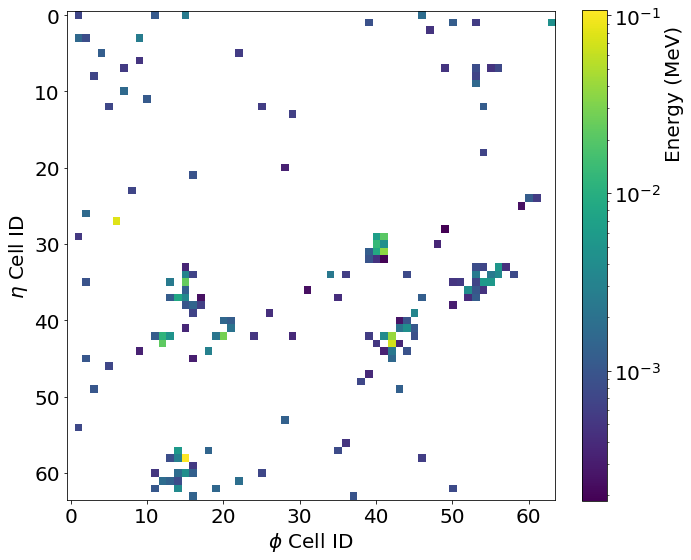

In [13]:
plot_image(images[0]) 

### Cross-section weighted first image 

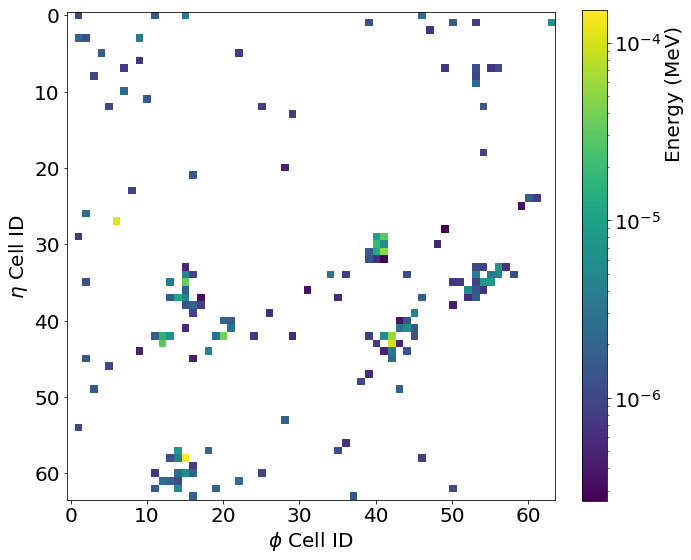

In [14]:
plot_image((weights[0]*images[0]))

## The HCAL images<br>

HCAL 이미지의 bkg, signal 입니다.<br>
weight가 곱해졌고, 전체의 평균값입니다

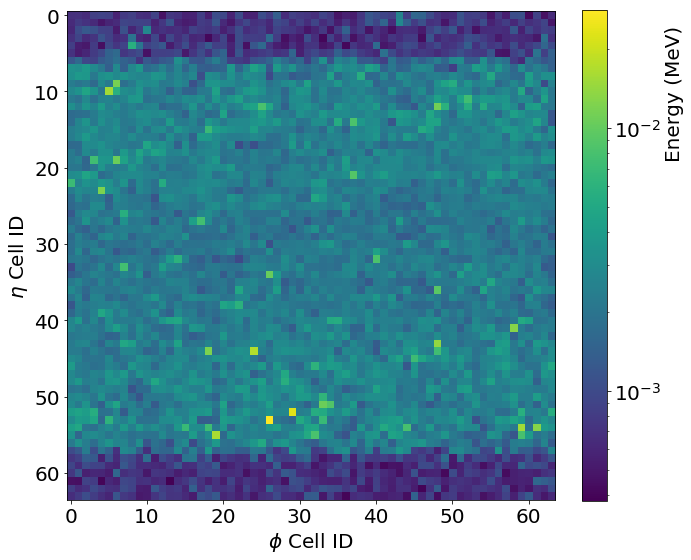

In [15]:
# -- average bkg
plot_image((weights.reshape(-1, 1, 1)*images)[labels==0].mean(axis=0))
#plot_image((images)[labels==0].mean(axis=0))


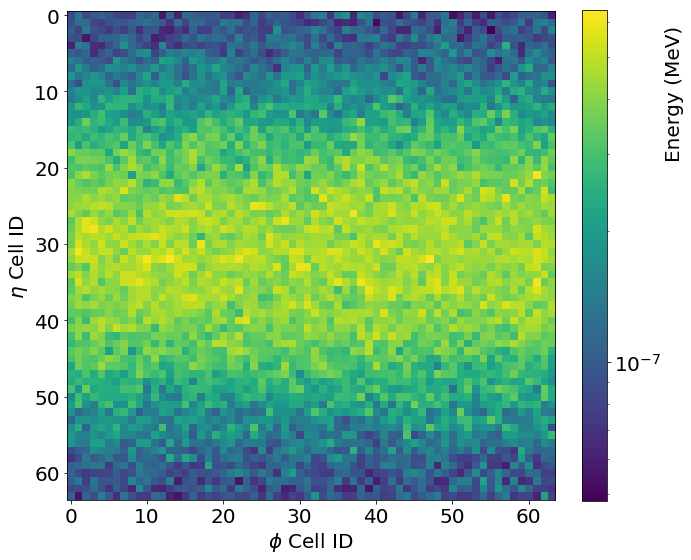

In [16]:
# -- average signal 
plot_image((weights.reshape(-1, 1, 1)*images)[labels==1].mean(axis=0))
#plot_image((images)[labels==1].mean(axis=0))



## ECAL images<br>
ECAL 이미지의 bkg, signal 입니다.<br>
weight가 곱해졌고, 전체의 평균값입니다

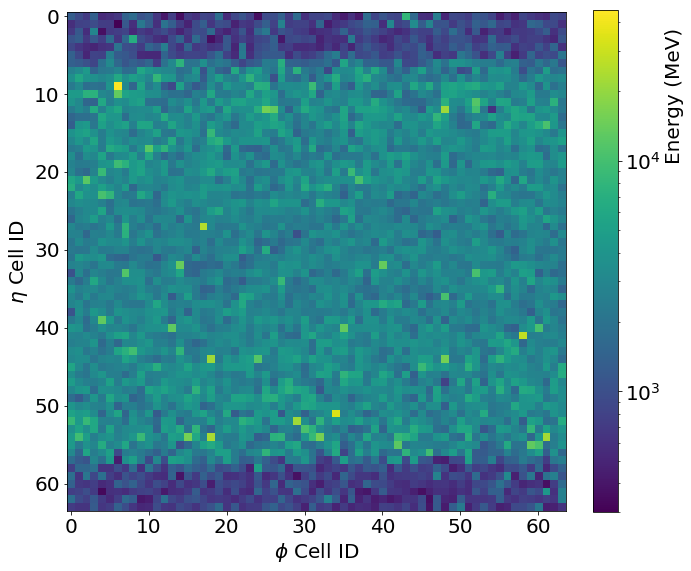

In [17]:
# -- average bkg
plot_image((weights.reshape(-1, 1, 1)*images_em)[labels==0].mean(axis=0))

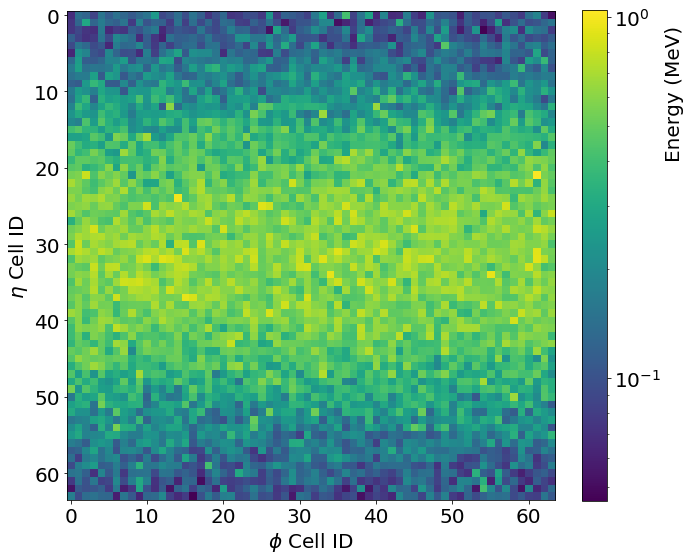

In [18]:
# -- average signal 
plot_image((weights.reshape(-1, 1, 1)*images_em)[labels==1].mean(axis=0))

## Tracker level images<br>
Tracker level 이미지의 bkg, signal 입니다.<br>
weight가 곱해졌고, 전체의 평균값입니다

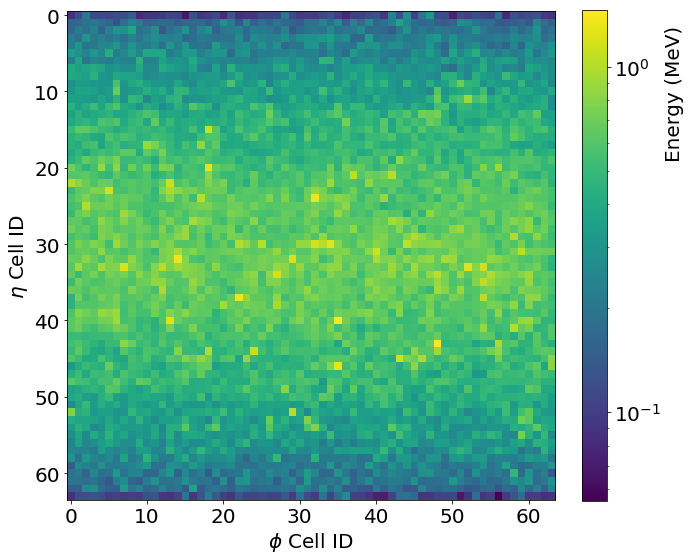

In [19]:
# -- average bkg
plot_image((weights.reshape(-1, 1, 1)*images_track)[labels==0].mean(axis=0))

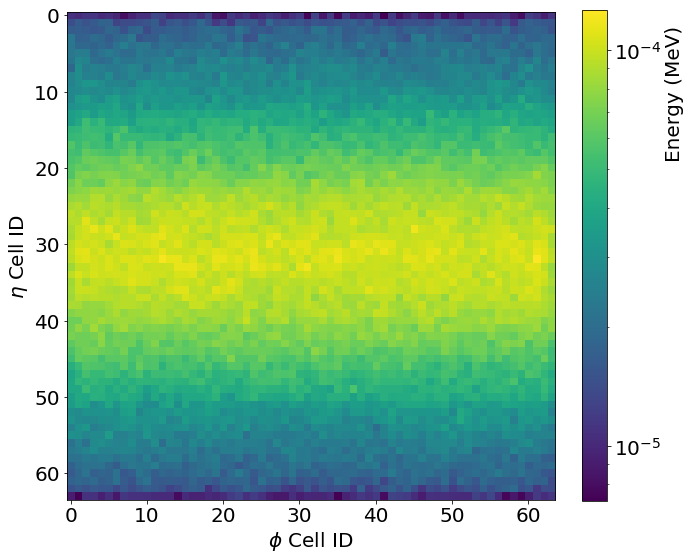

In [20]:
# -- average signal 
plot_image((weights.reshape(-1, 1, 1)*images_track)[labels==1].mean(axis=0))